In [1]:
import pandas as pd
import plotly.graph_objects as go
from scipy.cluster.hierarchy import  dendrogram,linkage
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming
from scipy.spatial.distance import pdist
import numpy as np

In [14]:
import os 
project_path = os.getcwd()
root_path = os.path.abspath(os.path.join(project_path, os.pardir))
file_path = os.path.join(root_path,'data/mvad_data.csv')
df = pd.read_csv(file_path)
print(df.head())

  Sep.93 Oct.93 Nov.93 Dec.93 Jan.94 Feb.94 Mar.94 Apr.94 May.94 Jun.94  ...  \
0     EM     EM     EM     EM     TR     TR     EM     EM     EM     EM  ...   
1     FE     FE     FE     FE     FE     FE     FE     FE     FE     FE  ...   
2     TR     TR     TR     TR     TR     TR     TR     TR     TR     TR  ...   
3     TR     TR     TR     TR     TR     TR     TR     TR     TR     TR  ...   
4     FE     FE     FE     FE     FE     FE     FE     FE     FE     FE  ...   

  Sep.98 Oct.98 Nov.98 Dec.98 Jan.99 Feb.99 Mar.99 Apr.99 May.99 Jun.99  
0     EM     EM     EM     EM     EM     EM     EM     EM     EM     EM  
1     HE     HE     HE     HE     HE     HE     HE     HE     HE     HE  
2     EM     EM     EM     EM     EM     EM     EM     EM     JL     JL  
3     EM     JL     JL     JL     JL     JL     JL     JL     JL     JL  
4     HE     HE     HE     HE     HE     HE     HE     HE     HE     HE  

[5 rows x 70 columns]


In [15]:
df.columns

Index(['Sep.93', 'Oct.93', 'Nov.93', 'Dec.93', 'Jan.94', 'Feb.94', 'Mar.94',
       'Apr.94', 'May.94', 'Jun.94', 'Jul.94', 'Aug.94', 'Sep.94', 'Oct.94',
       'Nov.94', 'Dec.94', 'Jan.95', 'Feb.95', 'Mar.95', 'Apr.95', 'May.95',
       'Jun.95', 'Jul.95', 'Aug.95', 'Sep.95', 'Oct.95', 'Nov.95', 'Dec.95',
       'Jan.96', 'Feb.96', 'Mar.96', 'Apr.96', 'May.96', 'Jun.96', 'Jul.96',
       'Aug.96', 'Sep.96', 'Oct.96', 'Nov.96', 'Dec.96', 'Jan.97', 'Feb.97',
       'Mar.97', 'Apr.97', 'May.97', 'Jun.97', 'Jul.97', 'Aug.97', 'Sep.97',
       'Oct.97', 'Nov.97', 'Dec.97', 'Jan.98', 'Feb.98', 'Mar.98', 'Apr.98',
       'May.98', 'Jun.98', 'Jul.98', 'Aug.98', 'Sep.98', 'Oct.98', 'Nov.98',
       'Dec.98', 'Jan.99', 'Feb.99', 'Mar.99', 'Apr.99', 'May.99', 'Jun.99'],
      dtype='object')

In [16]:
#df_subset = df.iloc[:10, :] 
df_subset = df
df_subset

,Sep.93,Oct.93,Nov.93,Dec.93,Jan.94,Feb.94,Mar.94,Apr.94,May.94,Jun.94,...,Sep.98,Oct.98,Nov.98,Dec.98,Jan.99,Feb.99,Mar.99,Apr.99,May.99,Jun.99
0,EM,EM,EM,EM,TR,TR,EM,EM,EM,EM,...,EM,EM,EM,EM,EM,EM,EM,EM,EM,EM
1,FE,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,HE,HE,HE,HE,HE,HE,HE,HE,HE,HE
2,TR,TR,TR,TR,TR,TR,TR,TR,TR,TR,...,EM,EM,EM,EM,EM,EM,EM,EM,JL,JL
3,TR,TR,TR,TR,TR,TR,TR,TR,TR,TR,...,EM,JL,JL,JL,JL,JL,JL,JL,JL,JL
4,FE,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,HE,HE,HE,HE,HE,HE,HE,HE,HE,HE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,FE,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,EM,HE,HE,HE,HE,HE,HE,HE,HE,HE
708,FE,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,JL,JL,JL,JL,JL,JL,JL,JL,JL,JL
709,SC,SC,SC,SC,SC,SC,SC,SC,SC,SC,...,HE,HE,HE,HE,HE,HE,HE,HE,HE,HE
710,TR,TR,TR,TR,TR,TR,TR,TR,TR,TR,...,EM,EM,EM,EM,EM,EM,EM,EM,EM,EM


In [18]:
drug_mapping = {"EM":2, "FE":4, "HE":6, "JL":8, "SC":10, "TR":12}
df_subsets_numeriques = df_subset.replace(drug_mapping)
df_subsets_numeriques

,Sep.93,Oct.93,Nov.93,Dec.93,Jan.94,Feb.94,Mar.94,Apr.94,May.94,Jun.94,...,Sep.98,Oct.98,Nov.98,Dec.98,Jan.99,Feb.99,Mar.99,Apr.99,May.99,Jun.99
0,2,2,2,2,12,12,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,4,4,4,4,4,4,4,4,4,4,...,6,6,6,6,6,6,6,6,6,6
2,12,12,12,12,12,12,12,12,12,12,...,2,2,2,2,2,2,2,2,8,8
3,12,12,12,12,12,12,12,12,12,12,...,2,8,8,8,8,8,8,8,8,8
4,4,4,4,4,4,4,4,4,4,4,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,4,4,4,4,4,4,4,4,4,4,...,2,6,6,6,6,6,6,6,6,6
708,4,4,4,4,4,4,4,4,4,4,...,8,8,8,8,8,8,8,8,8,8
709,10,10,10,10,10,10,10,10,10,10,...,6,6,6,6,6,6,6,6,6,6
710,12,12,12,12,12,12,12,12,12,12,...,2,2,2,2,2,2,2,2,2,2


## TAK (Ndiaga)

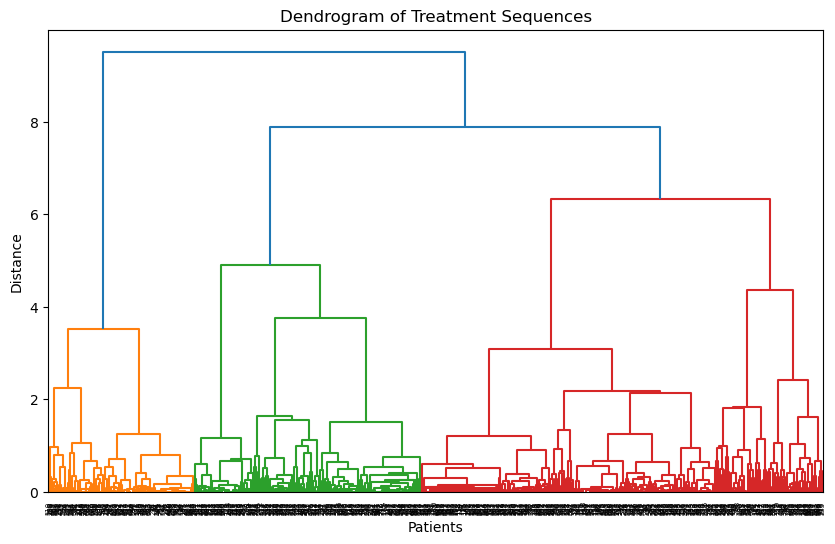

In [20]:
data_array = df_subsets_numeriques.to_numpy()
distance_matrix = pdist(data_array, 'hamming')    
linkage_matrix = linkage(distance_matrix, method='ward',optimal_ordering=True)
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram of Treatment Sequences')
plt.xlabel('Patients')
plt.ylabel('Distance')
plt.show()

In [21]:
leaves_order= list(hierarchy.leaves_list(linkage_matrix))
data_array = data_array[leaves_order]

In [23]:
leaves_order

[510,
 180,
 208,
 328,
 687,
 202,
 649,
 705,
 669,
 51,
 218,
 459,
 473,
 42,
 503,
 676,
 44,
 205,
 691,
 12,
 607,
 315,
 484,
 30,
 692,
 36,
 364,
 272,
 317,
 248,
 448,
 599,
 436,
 247,
 79,
 489,
 689,
 654,
 99,
 656,
 680,
 660,
 706,
 11,
 590,
 642,
 78,
 546,
 634,
 506,
 161,
 709,
 62,
 256,
 24,
 449,
 322,
 207,
 43,
 455,
 612,
 609,
 409,
 645,
 142,
 622,
 74,
 273,
 582,
 543,
 451,
 614,
 450,
 332,
 281,
 613,
 620,
 66,
 657,
 259,
 71,
 136,
 591,
 366,
 520,
 193,
 452,
 389,
 32,
 564,
 551,
 143,
 653,
 685,
 46,
 26,
 234,
 52,
 33,
 34,
 504,
 421,
 358,
 257,
 227,
 31,
 48,
 56,
 237,
 278,
 416,
 460,
 606,
 35,
 258,
 655,
 608,
 586,
 357,
 282,
 233,
 50,
 49,
 47,
 132,
 255,
 331,
 453,
 603,
 611,
 684,
 497,
 410,
 206,
 300,
 284,
 461,
 141,
 571,
 157,
 244,
 483,
 556,
 338,
 285,
 644,
 491,
 245,
 214,
 221,
 238,
 368,
 384,
 197,
 129,
 555,
 530,
 502,
 229,
 540,
 600,
 560,
 458,
 174,
 128,
 4,
 293,
 490,
 621,
 390,
 215,
 111,

In [22]:
import plotly.graph_objects as go

colors = ['blue', 'orange', 'green', 'red', 'yellow', 'gray']
heatmap = go.Heatmap(z=data_array,colorscale= colors)

# Créer une figure
fig = go.Figure(data=heatmap)
fig.update_layout(
    title='TAK ',
    xaxis_title='Temps',
    yaxis_title='Patients',
)

# Afficher le graphique
fig.show()

# Fitltre modal
Dans l'article original, il est mentionné qu'un filtre modal est utilisé pour cette étape

In [11]:
import numpy as np

def modal_filter(data, kernel_size):
    filtered_data = np.full_like(data, np.nan)
    kernel_rows, kernel_cols = kernel_size
    
    for i in range(len(data)):
        row_min = max(0, i - kernel_rows // 2)
        row_max = min(len(data), i + kernel_rows // 2 + 1)
        for j in range(len(data[i])):
            col_min = max(0, j - kernel_cols // 2)
            col_max = min(len(data[i]), j + kernel_cols // 2 + 1)
            kernel_values = data[row_min:row_max, col_min:col_max].flatten()
            # Filter out negative values and NaN
            kernel_values = kernel_values[~np.isnan(kernel_values)]
            if len(kernel_values) > 0:
                # Convert kernel_values to integers
                kernel_values_int = kernel_values.astype(int)
                most_frequent_value = np.argmax(np.bincount(kernel_values_int))
                filtered_data[i, j] = most_frequent_value
    
    return filtered_data



filtered_data_opt = modal_filter(data_array, (10, 7))

In [12]:


heatmap1 = go.Heatmap(z=filtered_data_opt,colorscale= colors)

# Créer une figure
fig = go.Figure(data=heatmap1)
fig.update_layout(
    title='Ordered Treatment Sequences  optimal leaves',
    xaxis_title='Temps',
    yaxis_title='Patients',
)

# Afficher le graphique
fig.show()

In [15]:

# List of treatments
treatments = ["EM", "FE", "HE", "JL", "SC", "TR"]

# Define colors for treatments
colors = ['blue', 'orange', 'green', 'red', 'yellow', 'gray']

# Create a figure
fig = go.Figure()

# Iterate over treatments
for treatment, color in zip(treatments, colors):
    # Extract data for the current treatment
    treatment_data = df[df.eq(treatment).any(axis=1)]
    # Get the columns representing months
    months = treatment_data.columns
    # Calculate the percentage of patients under the current treatment for each month
    percentages = (treatment_data.apply(lambda x: x.value_counts().get(treatment, 0)) / len(treatment_data)) * 100
    # Plot the curve for the percentage of patients under the treatment over time
    fig.add_trace(go.Scatter(x=months, y=percentages, mode='lines', name=treatment, line=dict(color=color)))

# Update layout
fig.update_layout(
    title='Percentage of Patients under Each Treatment Over Time',
    xaxis_title='Time',
    yaxis_title='Percentage of Patients',
    legend_title='Treatment',
    yaxis=dict(tickformat=".2f")
)

# Display the graph
fig.show()
